In [1]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)

2.1.2
2.2.3


In [2]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/davidholcer/GitHub/BattleBotsTemplate/ParseResults/myenv/bin:/Users/davidholcer/.opam/default/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/Users/davidholcer/Library/Python/3.13:/usr/local/bin/python3:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/davidholcer/.oh-my-zsh/custom/plugins/ansiweather:/opt/local/bin:/opt/local/sbin:/Users/davidholcer/.rvm/bin:/Users/davidholcer/.rvm/bin


In [3]:
import sys
print(sys.executable)


/Users/davidholcer/GitHub/BattleBotsTemplate/ParseResults/myenv/bin/python


In [4]:
import json
import pandas as pd
import re
from datetime import datetime
from collections import Counter
from nltk import ngrams
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


# Load JSON files (replace with your actual paths)
with open('posts.json', 'r') as f:
    posts_data = json.load(f)

with open('users.json', 'r') as f:
    users_data = json.load(f)

# Separate posts by bots (alphanumeric) vs real accounts (numeric)
bot_posts = []
real_posts = []

# Function to check if author_id is bot (alphanumeric) or real (numeric)
def is_bot(author_id):
    return any(char.isalpha() for char in author_id)

for post in posts_data['posts']:
    if is_bot(post['author_id']):
        bot_posts.append(post)
    else:
        real_posts.append(post)

# Create DataFrames for easier manipulation
posts_df = pd.DataFrame(posts_data['posts'])
users_df = pd.DataFrame(users_data['users'])


In [5]:
users_df

,id,tweet_count,z_score,username,name,description,location,detectors
0,e66dd811-edd2-485c-9da7-0e545af6a528,0,0.000000,aaronjayjack,Aaron Jayjack,"Storm Chaser. YouTube, Videographer, Photograp...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
1,43fce198-5fcb-4afb-92ce-6971cbb29a2e,0,0.000000,davidholcer,David Holcer,"Creating & Coding: Generative Art, Graphic Des...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
2,e66dd811-edd2-485c-9da7-0e545af6a528,2,0.000000,aaronjayjack,Aaron Jayjack,"Storm Chaser. YouTube, Videographer, Photograp...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
3,43fce198-5fcb-4afb-92ce-6971cbb29a2e,4,0.000000,davidholcer,David Holcer,"Creating & Coding: Generative Art, Graphic Des...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
4,e66dd811-edd2-485c-9da7-0e545af6a528,11,0.000000,aaronjayjack,Aaron Jayjack,"Storm Chaser. YouTube, Videographer, Photograp...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
...,...,...,...,...,...,...,...,...
438,1963588872,26,-0.003809,USA1LandofFree,Mike Bartlett,,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
439,785567936,80,2.595161,mavsmarie,mavsmarie,delusional #mffl,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
440,1739406020512727040,86,2.883936,Santos1100011,Santos,MAN U✖️RASMUS✖️REAL MADRID✖️VINI JR✖️BARCA✖️YA...,Idk,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
441,1646259756011515905,8,-0.870132,herinterludee,ًًً,18 🇬🇭 • blessed & highly favoured 💌🎧🎀🦢// free ...,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."


<!-- ## Getting N-gram Info
current problems: just single word, bi-gram, expand to tri, up to n
 -->

In [6]:
import json
from collections import Counter
import re
from nltk.util import everygrams
import nltk
nltk.download()
from nltk.corpus import stopwords


# bot_posts = [post for post in posts_data['posts'] if is_bot(post['author_id'])]
# real_posts = [post for post in posts_data['posts'] if not is_bot(post['author_id'])]

def extract_n_grams(text, n):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in re.findall(r'\b\w+\b', text) if word.lower() not in stop_words]
    return list(everygrams(tokens, max_len=n))

# Apply n-gram extraction to posts
bot_texts = [post['text'] for post in bot_posts]
real_texts = [post['text'] for post in real_posts]

# Apply n-gram extraction (up to 3-grams)
bot_n_grams = Counter([gram for text in bot_texts for gram in extract_n_grams(text, 3)])
real_n_grams = Counter([gram for text in real_texts for gram in extract_n_grams(text, 3)])

# Display top 10 n-grams for bots and real accounts
print("Top 10 Bot N-grams:", bot_n_grams.most_common(10))
print("Top 10 Real Account N-grams:", real_n_grams.most_common(10))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Top 10 Bot N-grams: [(('n',), 15), (('let',), 13), (('ud83d',), 12), (('game',), 10), (('n', 'n'), 9), (('never',), 9), (('every',), 9), (('co',), 8), (('co', 'twitter_link'), 8), (('twitter_link',), 8)]
Top 10 Real Account N-grams: [(('co',), 5913), (('https',), 5910), (('https', 'co'), 5910), (('https', 'co', 'twitter_link'), 5910), (('co', 'twitter_link'), 5910), (('twitter_link',), 5910), (('like',), 1037), (('mention',), 884), (('game',), 599), (('get',), 584)]


<!-- ## Getting text stats
current problems: unreadable, describe number of links total compared to total number of tweets, and total word count for both bots and nonbots. -->

In [7]:
# Count features and words
def count_text_stats(text):
    links = len(re.findall(r'http[s]?://\S+', text))
    hashtags = len(re.findall(r'#\w+', text))
    special_chars = len(re.findall(r'[\W_]', text))  # Example: emojis, punctuation
    word_count = len(re.findall(r'\b\w+\b', text))  # Word count
    return links, hashtags, special_chars, word_count

# Apply text stat extraction
bot_stats = [count_text_stats(post['text']) for post in bot_posts]
real_stats = [count_text_stats(post['text']) for post in real_posts]

# Convert to DataFrame for easier analysis
bot_stats_df = pd.DataFrame(bot_stats, columns=['links', 'hashtags', 'special_chars', 'word_count'])
real_stats_df = pd.DataFrame(real_stats, columns=['links', 'hashtags', 'special_chars', 'word_count'])

# Summarize totals and ratios
bot_total = len(bot_posts)
real_total = len(real_posts)

bot_links_total = bot_stats_df['links'].sum()
real_links_total = real_stats_df['links'].sum()

bot_word_count_total = bot_stats_df['word_count'].sum()
real_word_count_total = real_stats_df['word_count'].sum()

# Print out the results
print(f"Total Bot Posts: {bot_total}, Total Real Account Posts: {real_total}")
print(f"Bot Links Total: {bot_links_total}, Real Account Links Total: {real_links_total}")
print(f"Bot Word Count Total: {bot_word_count_total}, Real Account Word Count Total: {real_word_count_total}")

# Calculate averages
bot_avg_links = bot_links_total / bot_total if bot_total > 0 else 0
real_avg_links = real_links_total / real_total if real_total > 0 else 0

bot_avg_words = bot_word_count_total / bot_total if bot_total > 0 else 0
real_avg_words = real_word_count_total / real_total if real_total > 0 else 0


Total Bot Posts: 126, Total Real Account Posts: 10875
Bot Links Total: 8, Real Account Links Total: 5910
Bot Word Count Total: 1851, Real Account Word Count Total: 211754


<!-- ## Getting Time distribution heatmap
current problems: show two heatmaps for bots vs. nonbots. make the heatmaps hours compared to user. add barchart similar to following code:

```
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
``` -->

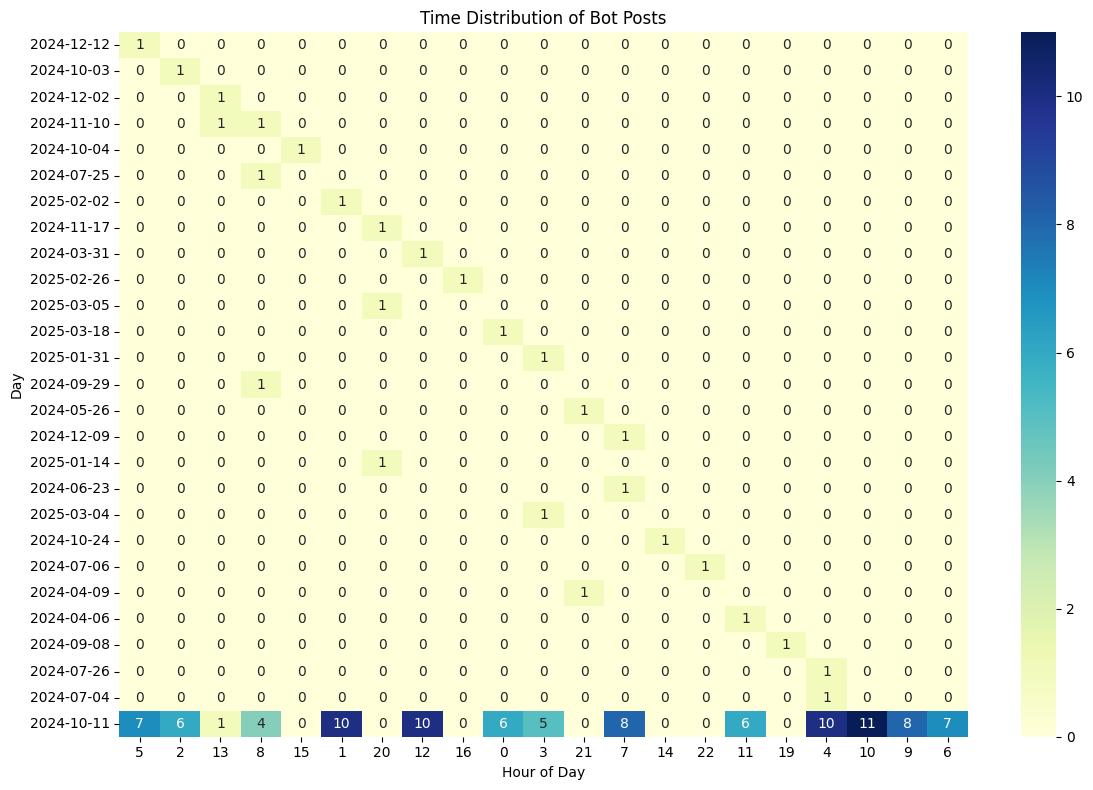

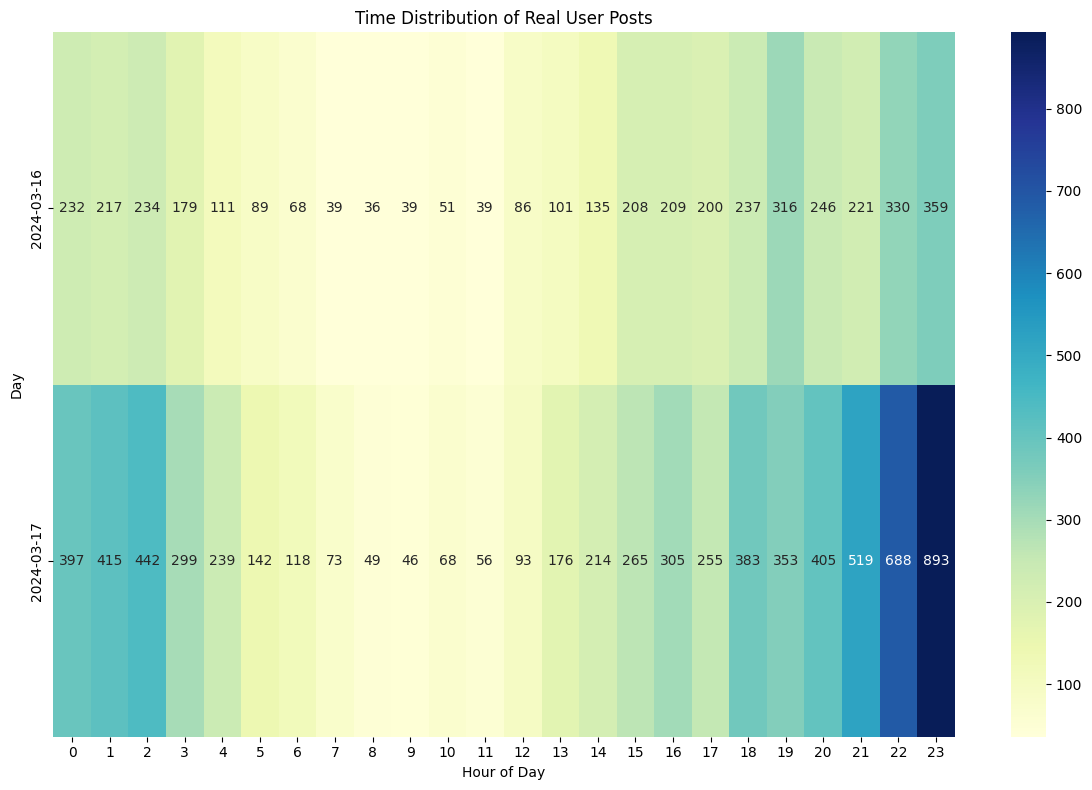


Additional Statistics:
Total bot posts: 126
Total real user posts: 10875
Average bot post length: 81.70 characters
Average real user post length: 105.33 characters


In [8]:
from collections import defaultdict

# Separate posts into bot and real posts lists
bot_posts = [post for post in posts_data['posts'] if is_bot(post['author_id'])]
real_posts = [post for post in posts_data['posts'] if not is_bot(post['author_id'])]

# Convert to DataFrames
bot_posts_df = pd.DataFrame(bot_posts)
real_posts_df = pd.DataFrame(real_posts)


# Function to prepare heatmap data from DataFrame
def prepare_heatmap_data(df):
    heatmap_data = defaultdict(lambda: defaultdict(int))
    for _, row in df.iterrows():
        created_at = pd.to_datetime(row['created_at'])
        day = created_at.date()
        hour = created_at.hour
        heatmap_data[day][hour] += 1
    return pd.DataFrame(heatmap_data).T.fillna(0)

def create_heatmap(df, title):
    heatmap_data = prepare_heatmap_data(df)
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel("Day")
    plt.tight_layout()
    plt.show()

# Generate heatmaps for bot posts and real posts
create_heatmap(bot_posts_df, "Time Distribution of Bot Posts")
create_heatmap(real_posts_df, "Time Distribution of Real User Posts")

# Additional statistics
print("\nAdditional Statistics:")
print(f"Total bot posts: {len(bot_posts_df)}")
print(f"Total real user posts: {len(real_posts_df)}")
print(f"Average bot post length: {bot_posts_df['text'].str.len().mean():.2f} characters")
print(f"Average real user post length: {real_posts_df['text'].str.len().mean():.2f} characters")

## Getting Confidence std deviation
current problems: make two seperate graphs for bots vs nonbots, showing std deviation for each.
actually calculate f1 scores. color/distinguish the confidence scores for when they are right in their prediction vs wrong. remember that a bot has alphanumeric user_id so it is distinguishable from the real accounts.


/var/folders/gg/2wr1srtx1r72kyp3cb_nzs6m0000gn/T/ipykernel_70367/643837041.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mcc_scores = detector_df.groupby('teamName').apply(calculate_mcc)


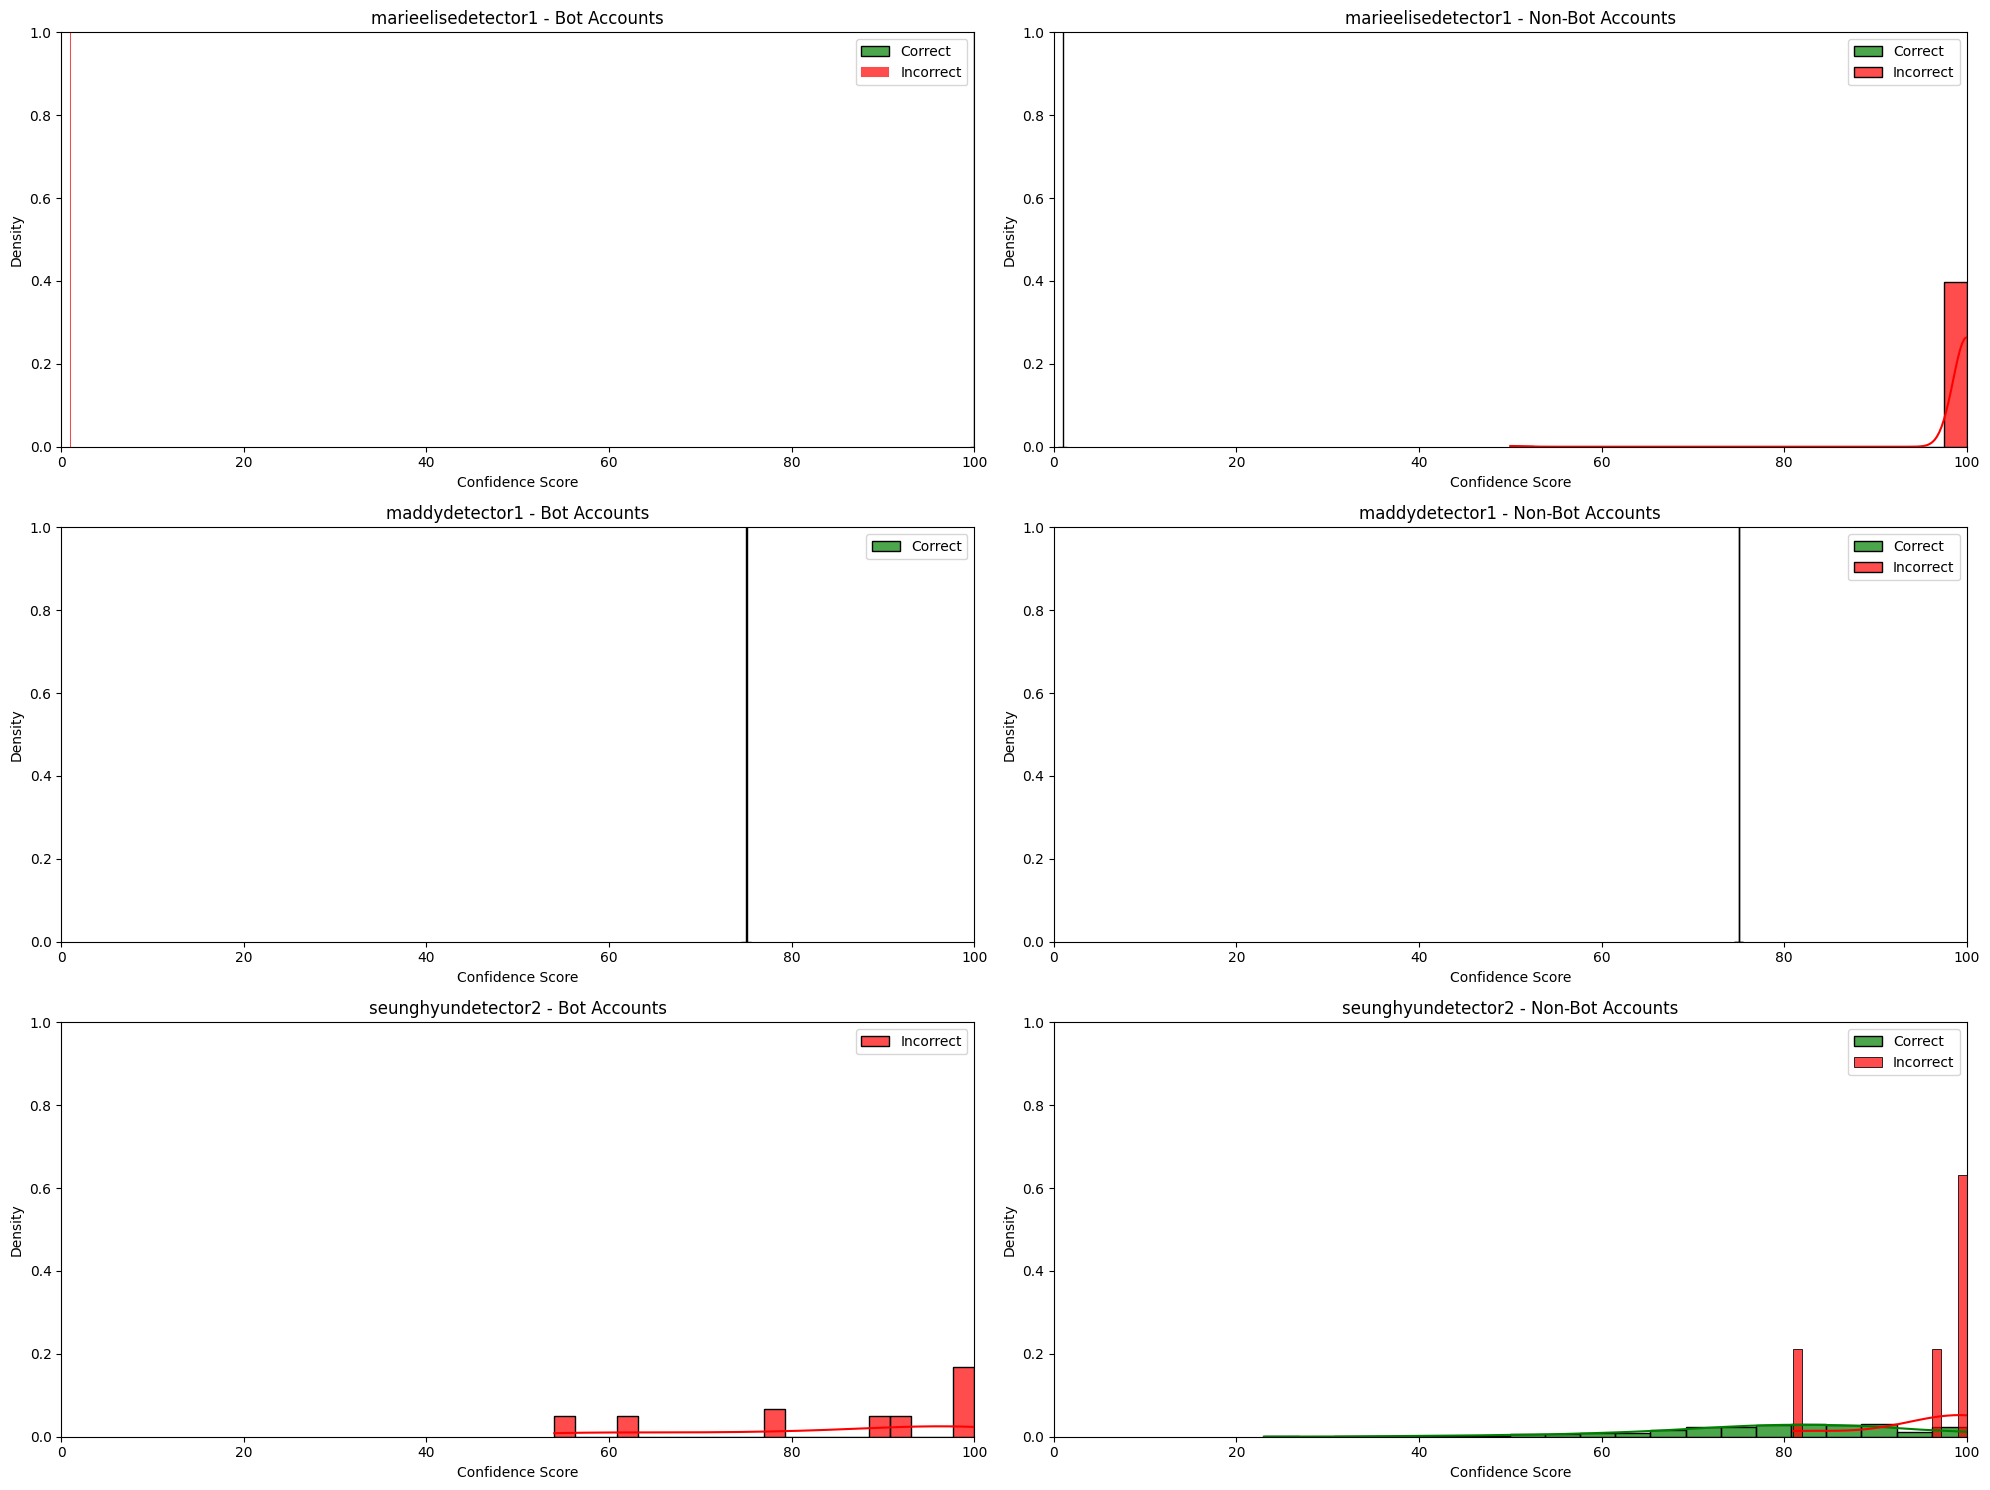

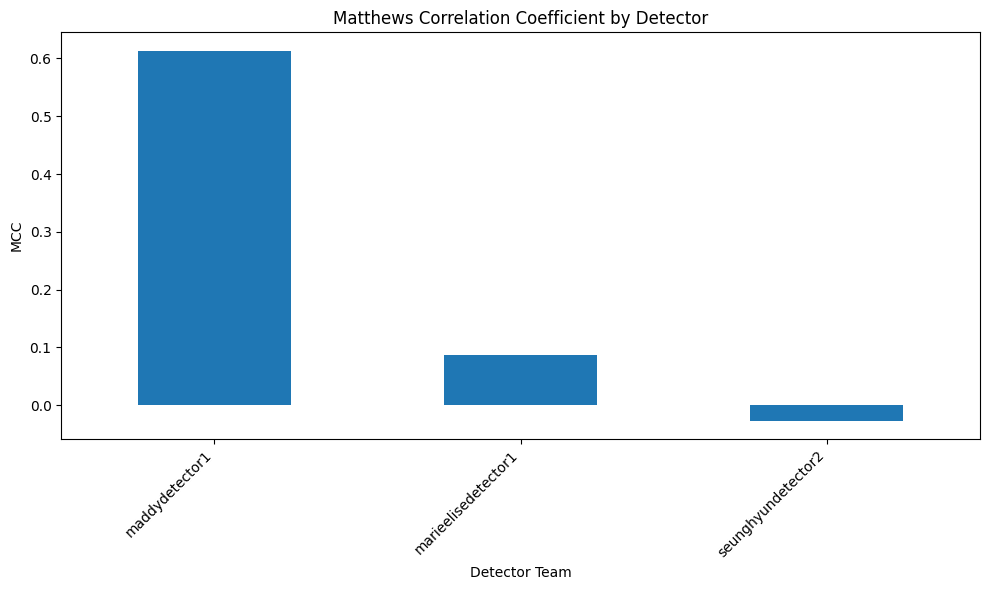

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, matthews_corrcoef


# Separate posts by bots vs real accounts
posts_df['is_bot'] = posts_df['author_id'].apply(is_bot)
bot_posts = posts_df[posts_df['is_bot']]
real_posts = posts_df[~posts_df['is_bot']]

# Prepare detector data
detector_data = []
for _, user in users_df.iterrows():
    true_label = is_bot(user['id'])
    for detector in user['detectors']:
        detector_data.append({
            'user_id': user['id'],
            'teamName': detector['teamName'],
            'predicted_bot': detector['isBot'],
            'confidence': detector['confidence'],
            'true_bot': true_label,
            'correct_prediction': detector['isBot'] == true_label
        })

detector_df = pd.DataFrame(detector_data)

# Calculate MCC for each detector
def calculate_mcc(group):
    return matthews_corrcoef(group['true_bot'], group['predicted_bot'])

mcc_scores = detector_df.groupby('teamName').apply(calculate_mcc)

# Plot confidence distributions per detector
unique_detectors = detector_df['teamName'].unique()
n_detectors = len(unique_detectors)
fig, axes = plt.subplots(n_detectors, 2, figsize=(20, 5 * n_detectors))

for i, detector in enumerate(unique_detectors):
    detector_data = detector_df[detector_df['teamName'] == detector]
    
    # Bot accounts
    bot_data = detector_data[detector_data['true_bot']]
    sns.histplot(bot_data[bot_data['correct_prediction']]['confidence'], 
                 ax=axes[i, 0], kde=True, color='green', bins=20, stat='density', label='Correct', alpha=0.7)
    sns.histplot(bot_data[~bot_data['correct_prediction']]['confidence'], 
                 ax=axes[i, 0], kde=True, color='red', bins=20, stat='density', label='Incorrect', alpha=0.7)
    axes[i, 0].set_title(f"{detector} - Bot Accounts")
    axes[i, 0].set_xlabel("Confidence Score")
    axes[i, 0].set_ylabel("Density")
    axes[i, 0].set_xlim(0, 100)
    axes[i, 0].set_ylim(0, 1)  # Set y-axis limit from 0 to 1
    axes[i, 0].legend()

    # Non-bot accounts
    non_bot_data = detector_data[~detector_data['true_bot']]
    sns.histplot(non_bot_data[non_bot_data['correct_prediction']]['confidence'], 
                 ax=axes[i, 1], kde=True, color='green', bins=20, stat='density', label='Correct', alpha=0.7)
    sns.histplot(non_bot_data[~non_bot_data['correct_prediction']]['confidence'], 
                 ax=axes[i, 1], kde=True, color='red', bins=20, stat='density', label='Incorrect', alpha=0.7)
    axes[i, 1].set_title(f"{detector} - Non-Bot Accounts")
    axes[i, 1].set_xlabel("Confidence Score")
    axes[i, 1].set_ylabel("Density")
    axes[i, 1].set_xlim(0, 100)
    axes[i, 1].set_ylim(0, 1)  # Set y-axis limit from 0 to 1
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

# Plot MCC scores
plt.figure(figsize=(10, 6))
mcc_scores.plot(kind='bar')
plt.title("Matthews Correlation Coefficient by Detector")
plt.xlabel("Detector Team")
plt.ylabel("MCC")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
detector_df

,user_id,teamName,predicted_bot,confidence,true_bot,correct_prediction
0,e66dd811-edd2-485c-9da7-0e545af6a528,marieelisedetector1,True,100,True,True
1,e66dd811-edd2-485c-9da7-0e545af6a528,maddydetector1,True,75,True,True
2,e66dd811-edd2-485c-9da7-0e545af6a528,seunghyundetector2,False,100,True,False
3,43fce198-5fcb-4afb-92ce-6971cbb29a2e,marieelisedetector1,True,100,True,True
4,43fce198-5fcb-4afb-92ce-6971cbb29a2e,maddydetector1,True,75,True,True
...,...,...,...,...,...,...
1324,1646259756011515905,maddydetector1,False,75,False,True
1325,1646259756011515905,seunghyundetector2,False,100,False,True
1326,1758376224781635584,marieelisedetector1,True,100,False,False
1327,1758376224781635584,maddydetector1,False,75,False,True
